### Week 2: Ridge Regression

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [3]:
from sklearn.datasets import fetch_openml

survey = fetch_openml(data_id=534, as_frame=True)

In [6]:
survey.data

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8.0,no,female,21.0,not_member,35.0,Hispanic,Other,Manufacturing,Married
1,9.0,no,female,42.0,not_member,57.0,White,Other,Manufacturing,Married
2,12.0,no,male,1.0,not_member,19.0,White,Other,Manufacturing,Unmarried
3,12.0,no,male,4.0,not_member,22.0,White,Other,Other,Unmarried
4,12.0,no,male,17.0,not_member,35.0,White,Other,Other,Married
...,...,...,...,...,...,...,...,...,...,...
529,18.0,no,male,5.0,not_member,29.0,White,Professional,Other,Unmarried
530,12.0,no,female,33.0,not_member,51.0,Other,Professional,Other,Married
531,17.0,no,female,25.0,member,48.0,Other,Professional,Other,Married
532,12.0,yes,male,13.0,member,31.0,White,Professional,Other,Married


In [7]:
X = pd.get_dummies(survey.data, drop_first = True)
y = survey.target

In [8]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

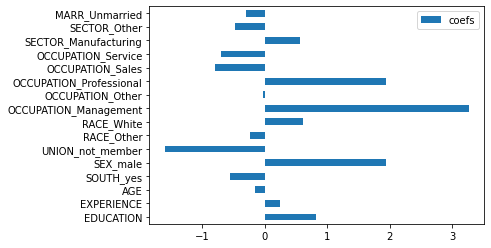

In [15]:
pd.DataFrame({'features': X.columns, 'coefs': lr.coef_}).plot(kind = 'barh')
plt.yticks([i for i in range(16)], [i for i in X.columns]);

In [16]:
sscaler = StandardScaler()
Xt = sscaler.fit_transform(X)

In [17]:
lr2 = LinearRegression()
lr2.fit(Xt, y)

LinearRegression()

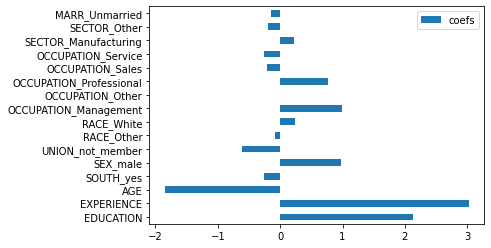

In [18]:
pd.DataFrame({'features': X.columns, 'coefs': lr2.coef_}).plot(kind = 'barh')
plt.yticks([i for i in range(16)], [i for i in X.columns]);

In [19]:
pd.DataFrame({'features': X.columns, 'coefs': lr2.coef_})

,features,coefs
0,EDUCATION,2.123761
1,EXPERIENCE,3.028271
2,AGE,-1.851394
3,SOUTH_yes,-0.255904
4,SEX_male,0.967958
5,UNION_not_member,-0.615048
6,RACE_Other,-0.076639
7,RACE_White,0.230986
8,OCCUPATION_Management,0.993382
9,OCCUPATION_Other,-0.010151
